In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Overlap')

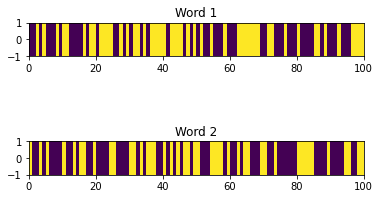

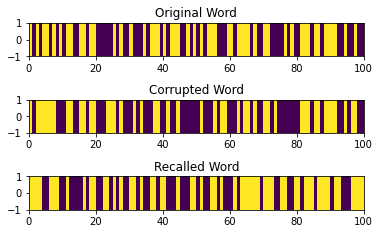

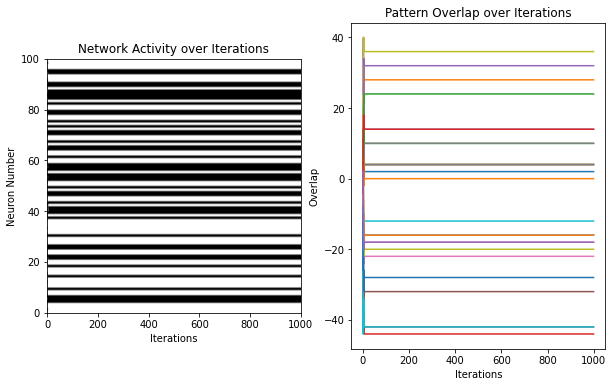

In [ ]:
N = 100 # Number of Bianary Neurons
P = 25

 # Number of Words

words = np.sign(np.random.rand(N,P) - .5); #Genrate Patterns
#Show Single Word Pattern
#word1 = plt.scatter(range(N), words[:,1])
#word2 = plt.scatter(range(N), words[:,2])
#legend1 = plt.legend([word1,word2], ["Word 1", "Word 2"])


word1 = np.reshape(words[:,1].copy(),(1,N))
word2 = np.reshape(words[:,2].copy(),(1,N))

word1[word1 == -1] = 0
word2[word2 == -1] = 0

Q1_plt1, Q1_ax1 = plt.subplots(2,1)
Q1_ax1[0].imshow(word1,extent = [0,N,-1,1], aspect = '5')
Q1_ax1[0].title.set_text("Word 1")
Q1_ax1[1].imshow(word2,extent = [0,N,-1,1], aspect = '5')
Q1_ax1[1].title.set_text("Word 2")
print()
#Generate Synapses

J = np.zeros((N,N))

p, n = words.shape
for i in range(n):
    J += np.outer(words[:, i], words[:, i])
np.fill_diagonal(J, 0)

# Take a random word and corrupt it
org_word_idx = np.random.randint(P)

# create an array of zeros
corrupted_word = words[:, org_word_idx].copy()
# randomly set half of the elements to 1
corrupt_idxs = np.random.choice(len(corrupted_word), size=(N // 2,), replace=False)
corrupted_word[corrupt_idxs] = np.sign(np.random.rand(N // 2) - .5)


# plt.scatter(range(N), words[:, org_word_idx], c = 'r', label = 'Original Word')
# plt.scatter(range(N), corrupted_word, c = 'b',label = 'Corrupted Word')
# plt.legend()




word1 = np.reshape(words[:,org_word_idx].copy(),(1,N))
word2 = np.reshape(corrupted_word,(1,N))

word1[word1 == -1] = 0
word2[word2 == -1] = 0

Q1_plot2, Q1_ax2 = plt.subplots(3,1)
Q1_ax2[0].imshow(word1,extent = [0,N,-1,1], aspect = '5')
Q1_ax2[0].title.set_text("Original Word")
Q1_ax2[1].imshow(word2,extent = [0,N,-1,1], aspect = '5')
Q1_ax2[1].title.set_text("Corrupted Word")

#Update Word 


T = 1000
t = 0


word_matrix = np.zeros((N,T))


while t < T:
    word_matrix[:,t] = corrupted_word.copy()
    y = np.dot(J, corrupted_word)
    corrupted_word_new = np.sign(y)

   
    # if np.array_equal(corrupted_word_new, corrupted_word):
    #     break
    

    
    corrupted_word = corrupted_word_new
    t += 1


# print(corrupted_word_new)
word3 = np.reshape(corrupted_word,(1,N))
word3[word3 == -1] = 0
Q1_ax2[2].imshow(word3,extent = [0,N,-1,1], aspect = '5')
Q1_ax2[2].title.set_text("Recalled Word")

votes = np.inner(np.transpose(word_matrix),np.transpose(words))

# plt.figure(figsize = (10,6))
Q1_plot3, Q1_ax3 = plt.subplots(1,2,figsize = (10,6))

word_matrix[word_matrix == -1] = 0;

Q1_ax3[0].imshow(word_matrix[:,:t], extent = [0,t,0,N], aspect = 10, cmap = 'gray')

Q1_ax3[0].title.set_text("Network Activity over Iterations")
Q1_ax3[0].set_xlabel('Iterations')
Q1_ax3[0].set_ylabel('Neuron Number')



# plt.show()
for p in range(P):
  Q1_ax3[1].plot(votes[0:t,p])
Q1_ax3[1].title.set_text("Pattern Overlap over Iterations")
Q1_ax3[1].set_xlabel('Iterations')
Q1_ax3[1].set_ylabel('Overlap')

# Generate a bank of unique Words

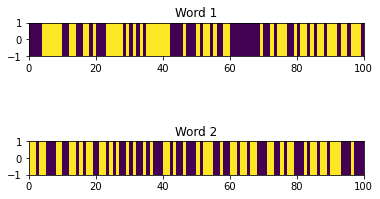

# Hopfield Network Recalls Words
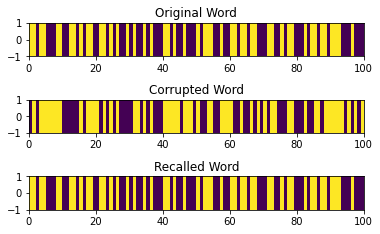


# Dynamics Overtime and Between Current Activation and Target Memories 
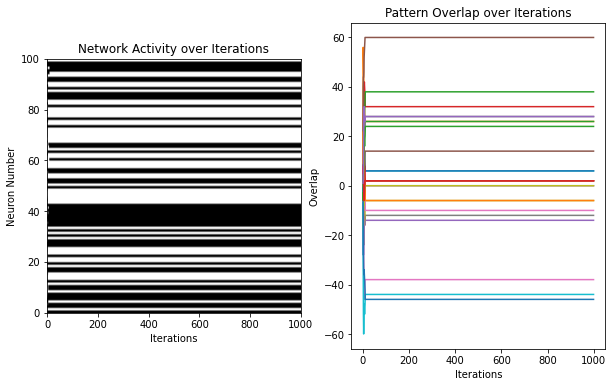


Text(0, 0.5, 'Number of Errors')

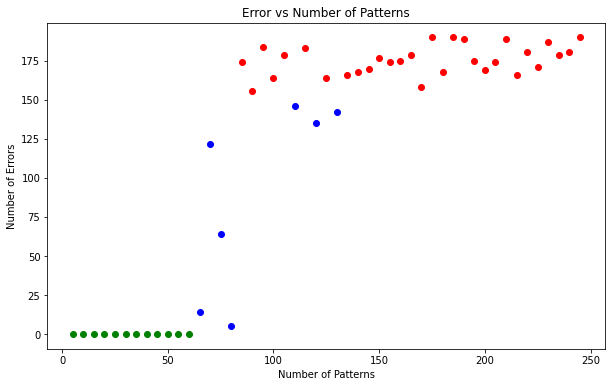

In [ ]:
# Run for Different number of Words

for P_itr in range(5,250, 5):
  N = 500 # Number of Bianary Neurons
  P = P_itr
  # Number of Words

  words = np.sign(np.random.rand(N,P) - .5); #Genrate Patterns

  J = np.zeros((N,N))

  p, n = words.shape
  for i in range(n):
      J += np.outer(words[:, i], words[:, i])
  np.fill_diagonal(J, 0)

  T = 100
  t = 0

  # Take a random word and corrupt it
  org_word_idx = np.random.randint(P)

  # create an array of zeros
  corrupted_word = words[:, org_word_idx].copy()
  # randomly set half of the elements to 1
  corrupt_idxs = np.random.choice(len(corrupted_word), size=(N // 2,), replace=False)
  corrupted_word[corrupt_idxs] = np.sign(np.random.rand(N // 2) - .5)


  word_matrix = np.zeros((N,T))
  
  err = np.zeros((T))


  while t < T:
      word_matrix[:,t] = corrupted_word.copy()
      
      err_min_idx = np.inner(np.transpose(words),np.transpose(corrupted_word)).argmax()
      err_temp_pos = 0
      err_temp_neg = 0
      for i in range(len(corrupted_word)):
        if corrupted_word[i] == words[i,err_min_idx]:
          err_temp_pos += 1
        if -corrupted_word[i] == words[i,err_min_idx]:
          err_temp_neg += 1

      # print(err_temp_pos)
      # print(err_temp_neg)
      err[t] = min(N-err_temp_pos,N-err_temp_neg)
      
      #print(err[t])
      y = np.dot(J, corrupted_word)
      corrupted_word_new = np.sign(y)


      # if np.array_equal(corrupted_word_new, corrupted_word):
        
      #   break

      

      # if err[t] == 0:
      #   plt.figure(1,figsize = (10,6))
      #   plt.scatter(P,t,c = 'Blue')
      #   break

      # if t == T - 1:
      #   plt.figure(1,figsize = (10,6))
      #   plt.scatter(P, err[t] ,c = 'Red')
      
      
      corrupted_word = corrupted_word_new
      t += 1
    
  # plt.figure(2, figsize = (10,6))
  # plt.plot(range(t),err[range(t)], label = f"Number of Patterns: {P}")
  # plt.legend()
  plt.figure(1,figsize = (10,6))

  if err[t-1] == 0:
    plt.scatter(P,err[t-1],c = 'Green')
  elif err[t-1] > 150:
    plt.scatter(P,err[t-1],c = 'red')
  else:
    plt.scatter(P,err[t-1],c = 'Blue')


plt.gca().title.set_text("Error vs Number of Patterns")
plt.gca().set_xlabel("Number of Patterns")
plt.gca().set_ylabel("Number of Errors")

# Error Vs Number of Patterns,

### With 500 Neurons you can comfortably store ~54 patterns without failures (Green Dots). There appears to be at least partial recall for about 100 patterns but once there are more than that recall appears to be nearly random. 

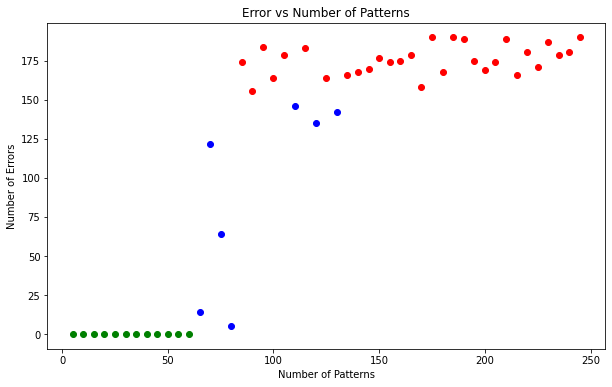

[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MISTY MORNIN            
[0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
MISTY MORNING SUNNY NOON
[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

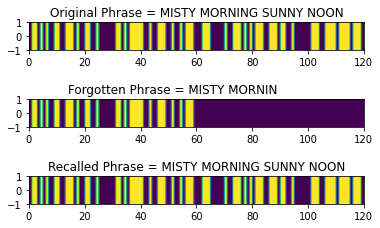

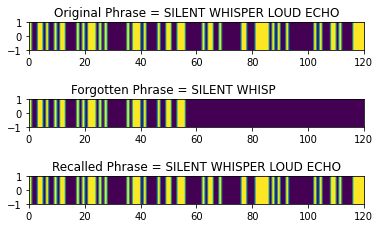

In [ ]:
# Encode strings into -1 and +1 bits
def encode_to_binary(string):
    binary = ""
    for letter in string:
        if letter == " ":
            binary += "00000"  # binary representation of space
        else:
            # binary representation of capital letters A-Z
            binary += format(ord(letter) - 65 + 1, "05b")
    
    
    bits = np.array([int(bit) * 2 - 1 for bit in binary])
    return bits

def decode_from_binary(input_arr):
    binary_string = ""
    for num in input_arr:
        if num == 1:
            binary_string += "1"
        else:
            binary_string += "0"
    string = ""
    for i in range(0, len(binary_string), 5):
        binary_char = binary_string[i:i+5]
        if binary_char == "00000":
            string += " "  # space
        else:
            char_num = int(binary_char, 2) + 65 - 1
            string += chr(char_num)
    return string



# For testing 
# string = "HELLO WORLD"
# binary = encode_to_binary(string)
# "Quiet winds fallen leaf" Extra Phrase for testing

# print(decode_from_binary(binary))
phrase_list = ["MISTY MORNING SUNNY NOON", "SILENT WHISPER LOUD ECHO" ]




N = 5*len(phrase_list[0]) #Define Number of Neurons Per Phrase
P = len(phrase_list) # Define Number of Patterns



words = np.zeros((N,P))

for p in range(len(phrase_list)):
  words[:,p] = encode_to_binary(phrase_list[p])  

#print(words)

J = np.zeros((N,N))

p, n = words.shape
for i in range(n):
    J += np.outer(words[:, i], words[:, i])
np.fill_diagonal(J, 0)



# Take first Phrase and corrupt it
org_word_idx = 0
corrupted_word = words[:, org_word_idx].copy()
corrupted_word[-(N//2):] = 0

# Demonstrate Corruption
word1 = np.reshape(words[:,org_word_idx].copy(),(1,N))
word2 = np.reshape(corrupted_word,(1,N))


word1[word1 == -1] = 0
word2[word2 == -1] = 0

Q2_fig1, Q2_ax1 = plt.subplots(3,1)
Q2_ax1[0].imshow(word1,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[0].set_title(f"Original Phrase = {decode_from_binary(words[:, org_word_idx])}")
Q2_ax1[1].imshow(word2,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[1].set_title(f"Forgotten Phrase = {decode_from_binary(corrupted_word)}")

print(corrupted_word)
print(decode_from_binary(corrupted_word))

T = 100
t = 0


word_matrix = np.zeros((N,T))

# Recall Phrase 

while t < T:
    word_matrix[:,t] = corrupted_word.copy()
    y = np.dot(J, corrupted_word)
    corrupted_word_new = np.sign(y)

   
    if np.array_equal(corrupted_word_new, corrupted_word):
        break
    

    
    corrupted_word = corrupted_word_new
    t += 1

word3 = np.reshape(corrupted_word,(1,N))
word3[word3 == -1] = 0
Q2_ax1[2].imshow(word3,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[2].title.set_text(f"Recalled Phrase = {decode_from_binary(corrupted_word)}")

print(corrupted_word)
print(decode_from_binary(corrupted_word))



# Take first Phrase and corrupt it
org_word_idx = 1
corrupted_word = words[:, org_word_idx].copy()
corrupted_word[-(N//2):] = 0

# Demonstrate Corruption
word1 = np.reshape(words[:,org_word_idx].copy(),(1,N))
word2 = np.reshape(corrupted_word,(1,N))


word1[word1 == -1] = 0
word2[word2 == -1] = 0

Q2_fig1, Q2_ax1 = plt.subplots(3,1)
Q2_ax1[0].imshow(word1,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[0].set_title(f"Original Phrase = {decode_from_binary(words[:, org_word_idx])}")
Q2_ax1[1].imshow(word2,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[1].set_title(f"Forgotten Phrase = {decode_from_binary(corrupted_word)}")

print(corrupted_word)
print(decode_from_binary(corrupted_word))

T = 100
t = 0


word_matrix = np.zeros((N,T))

# Recall Phrase 

while t < T:
    word_matrix[:,t] = corrupted_word.copy()
    y = np.dot(J, corrupted_word)
    corrupted_word_new = np.sign(y)

   
    if np.array_equal(corrupted_word_new, corrupted_word):
        break
    

    
    corrupted_word = corrupted_word_new
    t += 1

word3 = np.reshape(corrupted_word,(1,N))
word3[word3 == -1] = 0
Q2_ax1[2].imshow(word3,extent = [0,N,-1,1], aspect = '5')
Q2_ax1[2].title.set_text(f"Recalled Phrase = {decode_from_binary(corrupted_word)}")

print(corrupted_word)
print(decode_from_binary(corrupted_word))

